# Variational Autoencoder: VAE

In this notebook we explore the using of VAEs for anomaly detection. For this purpose, we will use the following procedure:

1. We use the train set for the training process. We use a non-contaminated version of the public test set for validation (to decide early stopping and avoid the overfitting over the training set).
2. The performance of the model was measured over the private test set.


TODO: 
1. Check if the performance improves when using QuantileTransform instead of MinMaxScaler.
2. Check if the performance improves when using only curves with more than 20 detections in both bands.
3. Check if the performance improves when more importance to the most important features of the Supervised RF-Detector is given.

In [1]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score

import torch
from torch.utils import data
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.nn import functional as F

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from barbar import Bar

from preprocess_singlein import get_mnist
from vae.train import TrainerVAE
from vae.test import eval

In [2]:
class Args:
    batch_size = 200
    num_epochs = 350
    lr = 1e-4
    patience = 100
    lr_milestones = [250]
    latent_dim = 32
    anormal_class = 5

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    
args = Args() # Parsing all the arguments for the training
dataloader_train, dataloader_val, dataloader_test = get_mnist(args)
vae = TrainerVAE(args, dataloader_train, dataloader_val, device)

## Training

In [3]:
vae.train()

4336/4336: [==============================>.] - ETA 0.4s
Training VAE... Epoch: 0, Loss: 0.216
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 0, Loss: 0.207
Weights saved.
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 1, Loss: 0.197
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 1, Loss: 0.201
Weights saved.
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 2, Loss: 0.180
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 2, Loss: 0.181
Weights saved.
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 3, Loss: 0.164
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 3, Loss: 0.154
Weights saved.
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 4, Loss: 0.148
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 4, Loss: 0

4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 40, Loss: 0.014
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 40, Loss: 0.0136
Weights saved.
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 41, Loss: 0.013
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 41, Loss: 0.0133
Weights saved.
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 42, Loss: 0.013
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 42, Loss: 0.0129
Weights saved.
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 43, Loss: 0.013
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 43, Loss: 0.0129
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 44, Loss: 0.013
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 44, Loss: 0.

1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 80, Loss: 0.00978
Weights saved.
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 81, Loss: 0.010
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 81, Loss: 0.00981
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 82, Loss: 0.010
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 82, Loss: 0.00976
Weights saved.
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 83, Loss: 0.010
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 83, Loss: 0.00977
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 84, Loss: 0.010
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 84, Loss: 0.00965
Weights saved.
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 85, Lo

4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 121, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 121, Loss: 0.00906
Weights saved.
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 122, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 122, Loss: 0.0091
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 123, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 123, Loss: 0.00906
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 124, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 124, Loss: 0.00902
Weights saved.
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 125, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 125, Loss: 0.00

4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 162, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 162, Loss: 0.00887
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 163, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 163, Loss: 0.00884
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 164, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 164, Loss: 0.00884
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 165, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 165, Loss: 0.00883
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 166, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 166, Loss: 0.00882
Weights saved.
4336/4336:

4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 203, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.0s
Testing VAE... Epoch: 203, Loss: 0.0087
Weights saved.
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 204, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 204, Loss: 0.00872
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 205, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 205, Loss: 0.00874
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 206, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 206, Loss: 0.00874
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 207, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 207, Loss: 0.00871
4336/4336: 

1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 244, Loss: 0.00864
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 245, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 245, Loss: 0.00865
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 246, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 246, Loss: 0.00865
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 247, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 247, Loss: 0.00863
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 248, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 248, Loss: 0.00867
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 249, Loss: 0.009
1085/1085: [=============

4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 286, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 286, Loss: 0.00864
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 287, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 287, Loss: 0.00863
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 288, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 288, Loss: 0.00861
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 289, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 289, Loss: 0.00861
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 290, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 290, Loss: 0.00868
4336/4336: [=============

4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 328, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 328, Loss: 0.00865
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 329, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 329, Loss: 0.00865
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 330, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 330, Loss: 0.00859
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 331, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 331, Loss: 0.00864
4336/4336: [==============================>.] - ETA 0.1s
Training VAE... Epoch: 332, Loss: 0.009
1085/1085: [==========================>.....] - ETA 0.1s
Testing VAE... Epoch: 332, Loss: 0.00862
4336/4336: [=============

## Learning curve

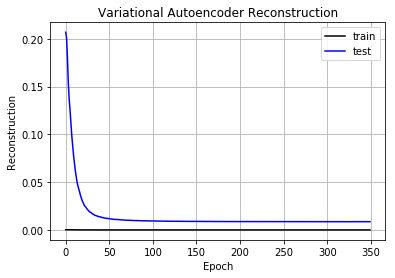

In [4]:
def plot_loss(values, values_t, metric):
    plt.plot(np.arange(len(values)), values, c='k', label='train')
    plt.plot(np.arange(len(values_t)), values_t, c='b', label='test')
    plt.title('Variational Autoencoder {}'.format(metric))
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.grid(True)

plot_loss(np.array(vae.reconst)/1000, np.array(vae.reconst_t), 'Reconstruction')

## Evaluation

In [7]:
import torch
import torch.nn.functional as F

from sklearn.metrics import roc_auc_score

def eval(net, dataloader, device):
    """Testing the VAE model"""

    scores = []
    latents = []
    labels1 = []
    labels2 = []
    net.eval()
    print('Testing...')
    with torch.no_grad():
        for x, y1, y2 in dataloader:
            x = x.float().to(device)
            x_hat, _, _, z = net(x)
            score = F.mse_loss(x_hat, x, reduction='none')
            score = torch.sum(score, dim=(1,2,3))

            scores.append(score.detach().cpu())
            latents.append(z.detach().cpu())
            labels1.append(y1.cpu())
            labels2.append(y2.cpu())
            
    labels1, labels2 = torch.cat(labels1).numpy(), torch.cat(labels2).numpy()
    scores, latents = torch.cat(scores).numpy(), torch.cat(latents).numpy()
    print('ROC AUC score: {:.3f}'.format(roc_auc_score(labels2, scores)))
    return labels1, labels2, scores, latents
labels1, labels2, scores, latents = eval(vae.model, dataloader_test, device)

Testing...
ROC AUC score: 0.546


In [8]:
x_embedded = TSNE(n_components=2).fit_transform(latents)

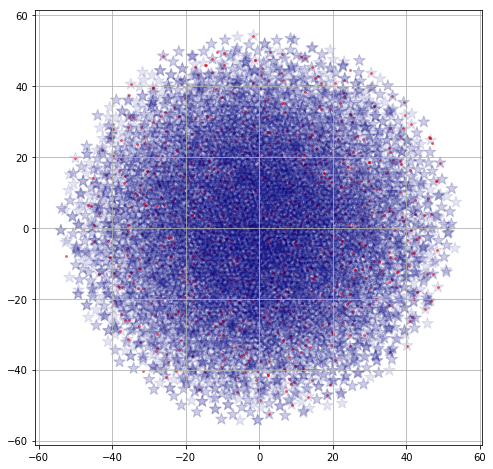

In [13]:
plt.figure(figsize=(8,8))
cmap = plt.get_cmap('jet', 4)
plt.scatter(x_embedded[:, 0][labels2==0], x_embedded[:, 1][labels2==0],
            s=15, c='r', alpha=0.5, marker='.')
plt.scatter(x_embedded[:, 0][labels2!=0], x_embedded[:, 1][labels2!=0], 
            c=labels2[labels2!=0].reshape(-1,),
            s=150, alpha=0.1, cmap=cmap, marker='*')

plt.grid(True)

In [14]:
scores_in = scores[labels2==0]
scores_out = scores[labels2==1]

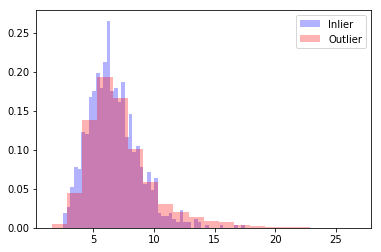

In [16]:
plt.hist(scores_in, bins=50, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_out, bins=20, color='r', alpha=0.3, density=True, label='Outlier')
plt.legend()